##                                                              LAPTOP PRICE PREDICTION

## Problem Statement:

## Importing Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle

## Data Collection:

In [3]:
df=pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.columns #Checking features

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## Exploratory Data Analysis & Pre-Processing:

## Checking Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
for i in df:
    uni=df[i].value_counts()
    print(i,':',uni)
    print("_______________________")

Unnamed: 0 : Unnamed: 0
0       1
856     1
874     1
873     1
872     1
       ..
433     1
432     1
431     1
430     1
1302    1
Name: count, Length: 1303, dtype: int64
_______________________
Company : Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
_______________________
TypeName : TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
_______________________
Inches : Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
1

## Dropping irrelevant features

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## Checking Nulls Values

In [8]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [10]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [11]:
df['Weight'].value_counts()

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

## Removing Units from Object Features

In [12]:
df['Weight']=df['Weight'].str.replace('kg','',regex=False)
df['Ram']=df['Ram'].str.replace('GB','',regex=False)

## Changing DataType to Numerical

In [13]:
df['Weight']=pd.to_numeric(df['Weight'])
df['Ram']=pd.to_numeric(df['Ram'])

In [14]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [15]:
df.info() #Updated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


## Checking Skew

In [16]:
a=df.describe().columns

for i in a:
    print(i,skew(df[i]))

Inches -0.44639851728922014
Ram 2.683712250564093
Weight 1.1436444137870962
Price 1.5191142034364629


In [17]:
#Assigning numerical features in a list to plot the outliers
b=['Inches','Ram','Weight']

##  Plotting Boxplot to check Outliers

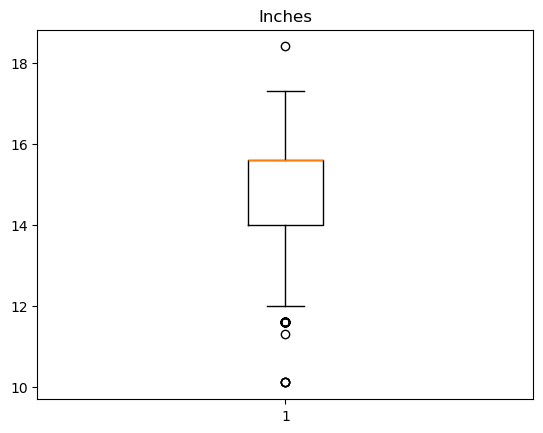

q1 14.0
q2 15.6
q3 15.6
iqr 1.5999999999999996
uppertail 18.0
lowetail 11.600000000000001


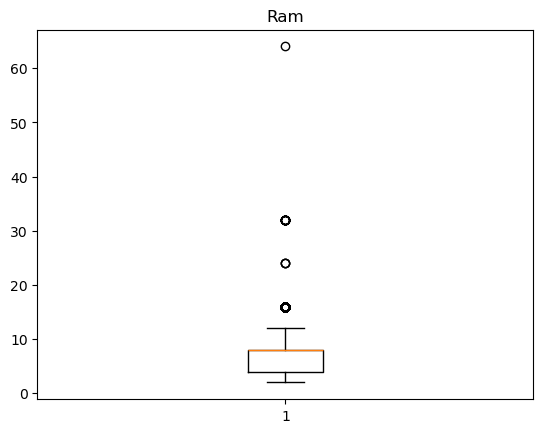

q1 4.0
q2 8.0
q3 8.0
iqr 4.0
uppertail 14.0
lowetail -2.0


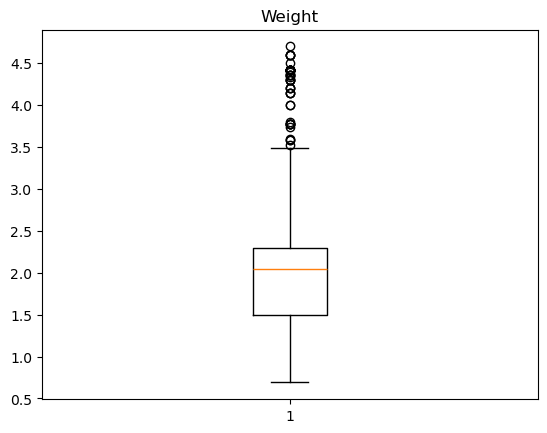

q1 1.5
q2 2.04
q3 2.3
iqr 0.7999999999999998
uppertail 3.4999999999999996
lowetail 0.30000000000000027


In [18]:
for i in b:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    uppertail=q3+1.5*iqr
    lowertail=q1-1.5*iqr

    print('q1',q1)
    print('q2',q2)
    print('q3',q3)
    print('iqr',iqr)
    print('uppertail',uppertail)
    print('lowetail',lowertail)

## Handling/Removing/Replacing Outliers

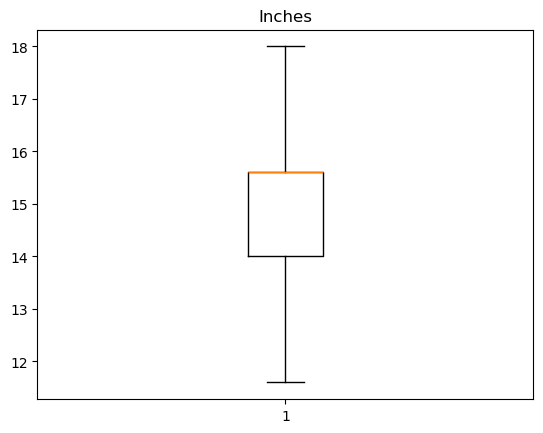

In [22]:
plt.boxplot(df['Inches']) #Inches Feature
plt.title('Inches')
plt.show()

q1=df['Inches'].quantile(0.25)
q2=df['Inches'].quantile(0.50)
q3=df['Inches'].quantile(0.75)
iqr=q3-q1
uppertail=q3+1.5*iqr
lowertail=q1-1.5*iqr
df.loc[df['Inches']>uppertail,'Inches']=uppertail
df.loc[df['Inches']<lowertail,'Inches']=lowertail

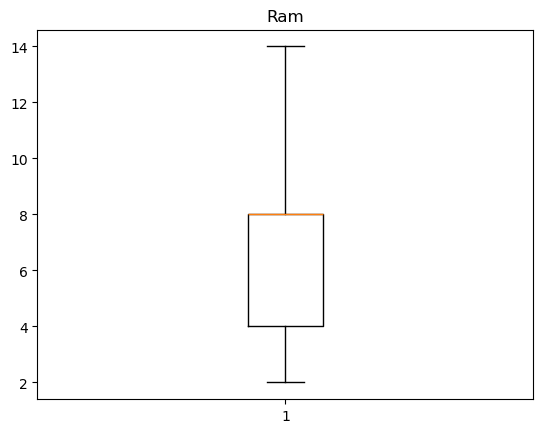

In [23]:
plt.boxplot(df['Ram']) #Inches Feature
plt.title('Ram')
plt.show()

q1=df['Ram'].quantile(0.25)
q2=df['Ram'].quantile(0.50)
q3=df['Ram'].quantile(0.75)
iqr=q3-q1
uppertail=q3+1.5*iqr
lowertail=q1-1.5*iqr
df.loc[df['Ram']>uppertail,'Ram']=uppertail
df.loc[df['Ram']<lowertail,'Ram']=lowertail

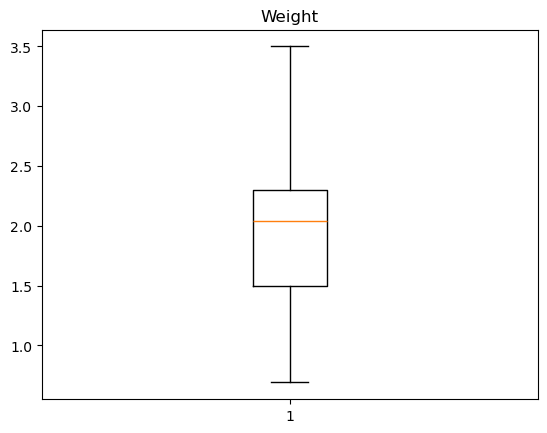

In [24]:
plt.boxplot(df['Weight']) #Weight Feature
plt.title('Weight')
plt.show()

q1=df['Weight'].quantile(0.25)
q2=df['Weight'].quantile(0.50)
q3=df['Weight'].quantile(0.75)
iqr=q3-q1
uppertail=q3+1.5*iqr
lowertail=q1-1.5*iqr
df.loc[df['Weight']>uppertail,'Weight']=uppertail
df.loc[df['Weight']<lowertail,'Weight']=lowertail

## Checking Skew after the Handling of Outliers

In [25]:
for i in b:
    print(i,skew(df[i]))

Inches -0.38409413985886237
Ram 0.5824257335123812
Weight 0.4503281158440279


## Encoding:

## get_dummies

In [26]:
#Assigning categorical features in a list for encoding
c=df.select_dtypes('object').columns

In [27]:
df=pd.get_dummies(df,columns=c).astype(int)
df

,Inches,Ram,Weight,Price,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13,8,1,71378,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13,8,1,47895,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15,8,1,30636,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,15,14,1,135195,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13,8,1,96095,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14,4,1,33992,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,13,14,1,79866,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1300,14,2,1,12201,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1301,15,6,2,40705,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Scaling:

## MinMaxScaler

In [28]:
m=MinMaxScaler()

In [29]:
df['Weight'].value_counts()

Weight
2    628
1    568
3     89
0     18
Name: count, dtype: int64

In [30]:
b1=['Inches','Ram']

In [31]:
for i in b1:
    df[i]=m.fit_transform(df[[i]])

In [32]:
df

,Inches,Ram,Weight,Price,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,0.285714,0.500000,1,71378,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.285714,0.500000,1,47895,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.571429,0.500000,1,30636,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.571429,1.000000,1,135195,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.285714,0.500000,1,96095,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0.428571,0.166667,1,33992,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1299,0.285714,1.000000,1,79866,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1300,0.428571,0.000000,1,12201,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1301,0.571429,0.333333,2,40705,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting the features and target into x and y

In [33]:
x=df.drop('Price',axis=1)
y=df['Price']

## Building Model:

## Train-Test-Split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

## Decision Tree Regressor

In [99]:
dtr=DecisionTreeRegressor()

In [100]:
#hyperparameter
hyperparameter={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                'max_depth':np.arange(3,8),
                'min_samples_split':np.arange(10,15)}

In [101]:
dtr_rs=RandomizedSearchCV(dtr,hyperparameter,cv=5)

In [102]:
dtr_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([10, 11, 12, 13, 14])})

In [39]:
dt1=dtr_rs.best_estimator_
dt1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=13)

In [40]:
y_pred_dt=dt1.predict(x_test)

In [104]:
y_pred_dt_train=dt1.predict(x_train)

In [41]:
dt1.score(x_train,y_train)*100

79.4374641781028

In [42]:
dt1.score(x_test,y_test)*100

72.49600992263441

## Random Forest Regressor

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [44]:
rfr=RandomForestRegressor()

In [45]:
#hyperparameter
hyperparameter={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                'max_depth':np.arange(3,8),
                'min_samples_split':np.arange(10,15)}

In [46]:
rfr_rs=RandomizedSearchCV(rfr,hyperparameter,cv=5)

In [47]:
rfr_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([10, 11, 12, 13, 14])})

In [48]:
rf1=rfr_rs.best_estimator_
rf1.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_split=10)

In [49]:
y_pred_rf=rf1.predict(x_test)

In [106]:
y_pred_rf_train=rf1.predict(x_train)

In [50]:
rf1.score(x_train,y_train)*100

84.54603815563068

In [51]:
rf1.score(x_test,y_test)*100

80.18782981286921

## Gradient Boosting Regressor

In [84]:
gbr=GradientBoostingRegressor()

In [85]:
#hyperparameter tuning
para={
    'learning_rate':[0.1,0.3,0.5,0.7,0.9],
    'n_estimators':[50,100,150,200,250],
    'max_depth':[3,4,5,6,7],
    'min_samples_split':[2,3,4,5,6],
    'random_state':np.arange(0,50)
}

In [86]:
gbr_rs=RandomizedSearchCV(gbr,para,cv=5)

In [87]:
gbr_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.3, 0.5, 0.7,
                                                          0.9],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250],
                                        'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [88]:
gbr1=gbr_rs.best_estimator_
gbr1.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=44)

In [89]:
y_pred_gb=gbr1.predict(x_test)

In [107]:
y_pred_gb_train=gbr1.predict(x_train)

In [90]:
gbr1.score(x_train,y_train)*100

94.61955512496105

In [91]:
gbr1.score(x_test,y_test)*100

85.9210590010871

## Visualization:

## Scatter Plots of Actual Vs Predicted Prices

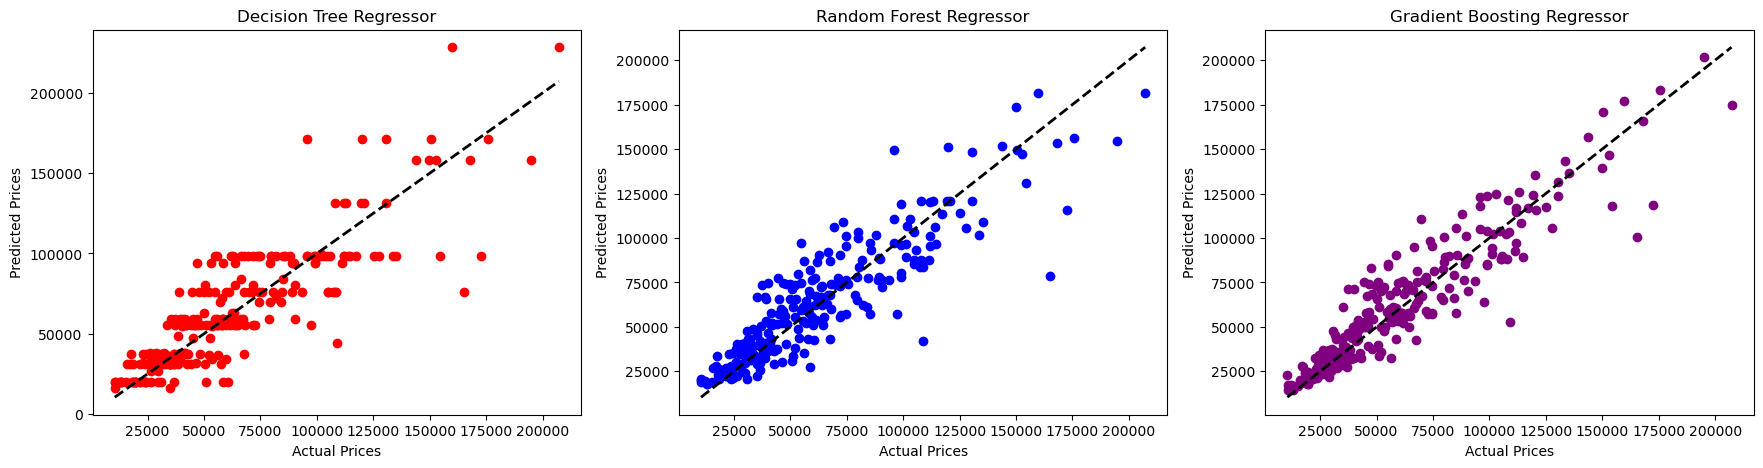

In [108]:
plt.figure(figsize=(29,5))

plt.subplot(1,4,1) #DecisionTree
plt.scatter(y_test, y_pred_dt, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree Regressor')

plt.subplot(1,4,2) #RandomForest
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regressor')

plt.subplot(1,4,3) #GradientBoosting
plt.scatter(y_test, y_pred_gb, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--',lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Regressor')
plt.show()

## Using Ridge Regression to reduce overfitting

In [94]:
R1=Ridge(alpha=0.1)

In [95]:
R1.fit(x,y)

Ridge(alpha=0.1)

In [96]:
R1.score(x_train,y_train)*100

91.35009191815139

In [97]:
R1.score(x_test,y_test)*100

92.65166925996378

##  Final Model Scores:

In [111]:
mse_train_dtr=mean_squared_error(y_train,y_pred_dt_train)
mae_train_dtr=mean_absolute_error(y_train,y_pred_dt_train)
mse_test_dtr=mean_squared_error(y_test,y_pred_dt)
mae_test_dtr=mean_absolute_error(y_test,y_pred_dt)
train_dtr=dt1.score(x_train,y_train)*100
test_dtr=dt1.score(x_test,y_test)*100

mse_train_rf=mean_squared_error(y_train,y_pred_rf_train)
mae_train_rf=mean_absolute_error(y_train,y_pred_rf_train)
mse_test_rf=mean_squared_error(y_test,y_pred_rf)
mae_test_rf=mean_absolute_error(y_test,y_pred_rf)
train_rfr=rf1.score(x_train,y_train)*100
test_rfr=rf1.score(x_test,y_test)*100

mse_train_gb=mean_squared_error(y_train,y_pred_gb_train)
mae_train_gb=mean_absolute_error(y_train,y_pred_gb_train)
mse_test_gb=mean_squared_error(y_test,y_pred_gb)
mae_test_gb=mean_absolute_error(y_test,y_pred_gb)
train_gbr=gbr1.score(x_train,y_train)*100
test_gbr=gbr1.score(x_test,y_test)*100

ridge_train=R1.score(x_train,y_train)*100
ridge_test=R1.score(x_test,y_test)*100

In [112]:
print('Decision Tree Regressor Training Score:',train_dtr)
print('Decision Tree Regressor Testing Score:',test_dtr)
print('Mean squared Error Training:',mse_train_dtr)
print('Mean absolute error training:',mae_train_dtr)
print("______________________________________________________")
print('Random Forest Regressor Training Score:',train_rfr)
print('Random Forest Regressor Testing Score:',test_rfr)
print('Mean squared Error Training:',mse_train_rf)
print('Mean absolute error training:',mae_train_rf)
print("______________________________________________________")
print('Gradient Boosting Regressor Training Score:',train_gbr)
print('Gradient Boosting Regressor Testing Score:',test_gbr)
print('Mean squared Error Training:',mse_train_gb)
print('Mean absolute error training:',mae_train_gb)
print("______________________________________________________")
print('Ridge Training Score:',ridge_train)
print('Ridge Testing Score:',ridge_test)

Decision Tree Regressor Training Score: 79.4374641781028
Decision Tree Regressor Testing Score: 72.49600992263441
Mean squared Error Training: 284205828.3759992
Mean absolute error training: 11461.34384619547
______________________________________________________
Random Forest Regressor Training Score: 84.54603815563068
Random Forest Regressor Testing Score: 80.18782981286921
Mean squared Error Training: 213597489.420195
Mean absolute error training: 10432.634514268657
______________________________________________________
Gradient Boosting Regressor Training Score: 94.61955512496105
Gradient Boosting Regressor Testing Score: 85.9210590010871
Mean squared Error Training: 74366012.343353
Mean absolute error training: 6442.990158422058
______________________________________________________
Ridge Training Score: 91.35009191815139
Ridge Testing Score: 92.65166925996378


## Creating Pickle

In [ ]:
with open('laptop price model.pkl','wb') as f:
    pickle.dump(gbr1,f)